In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np

In [3]:
IMAGE_SIZE=16

In [4]:
composed=transforms.Compose([transforms.Resize((IMAGE_SIZE,IMAGE_SIZE)),transforms.ToTensor()])

In [5]:
train_dataset=dsets.MNIST(root='./data',train=True,download=True,transform=composed)

100%|███████████████████████████████████████████████████████████████████| 9912422/9912422 [00:01<00:00, 9172863.71it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 20615332.51it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



100%|███████████████████████████████████████████████████████████████████| 1648877/1648877 [00:00<00:00, 3080657.57it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|█████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 4483532.31it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [6]:
validation_dataset=dsets.MNIST(root='./data',train=False,download=True,transform=composed)

In [7]:
type(train_dataset[0][1])

int

In [8]:
train_dataset[3][1]

1

In [20]:
train_dataset[3]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0902, 0.1765, 0.0471, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0667, 0.6431, 0.8510, 0.2275, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0078, 0.2588, 0.8745, 0.6824, 0.1490, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.1451, 0.7451, 0.8235, 0.1843, 0.0078, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0392,
           0.4706, 

In [34]:
im, lab = next(iter(train_dataset))

In [37]:
im.shape

torch.Size([1, 16, 16])

In [36]:
lab

5

In [40]:
class CNN(nn.Module):
    def __init__(self,out_1=16,out_2=32):
        super(CNN,self).__init__()
        self.cnn1=nn.Conv2d(in_channels=1,out_channels=out_1,kernel_size=5,padding=2)
        self.maxpool1=nn.MaxPool2d(kernel_size=2)
        
        self.cnn2=nn.Conv2d(in_channels=out_1,out_channels=out_2,kernel_size=5,stride=1,padding=2)
        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1=nn.Linear(out_2*4*4,10)
    
    def forward(self,x):
        x=self.cnn1(x)
        x=torch.relu(x)
        x=self.maxpool1(x)
        x=self.cnn2(x)
        x=torch.relu(x)
        x=self.maxpool2(x)
        x=x.view(x.size(0),-1)
        x=self.fc1(x)
        return x

In [41]:
model=CNN(out_1=16,out_2=32)
criterion=nn.CrossEntropyLoss()
learning_rate=0.1
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)
train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=100)
validation_loader=torch.utils.data.DataLoader(dataset=validation_dataset,batch_size=5000)


In [42]:
n_epochs=3
cost_list=[]
accuracy_list=[]
N_test=len(validation_dataset)
COST=0
def train_model(n_epochs):
    for epoch in range(n_epochs):
        COST=0
        for x,y in train_loader:
            optimizer.zero_grad()
            z=model(x)
            loss=criterion(z,y)
            loss.backward()
            optimizer.step()
            COST+=loss.data
        cost_list.append(COST)
        correct=0
        for x_test,y_test in validation_loader:
            z=model(x_test)
            _,yhat=torch.max(z.data,1)
            correct+=(yhat==y_test).sum().item()
        accuracy=correct/N_test
        accuracy_list.append(accuracy)

In [43]:
train_model(n_epochs)

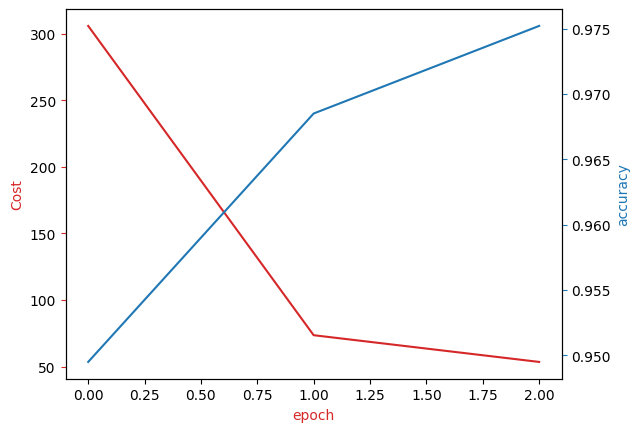

In [45]:
fig,ax1=plt.subplots()
color='tab:red'
ax1.plot(cost_list,color=color)
ax1.set_xlabel('epoch',color=color)
ax1.set_ylabel('Cost',color=color)
ax1.tick_params(axis='y',color=color)
ax2=ax1.twinx()
color='tab:blue'
ax2.set_ylabel('accuracy',color=color)
ax2.set_xlabel('epoch',color=color)
ax2.plot(accuracy_list,color=color)
ax2.tick_params(axis='y',color=color)
# flg.tight_layout()